<a href="https://colab.research.google.com/github/navyajain7105/Digital-Image-Processing/blob/main/Spatial_Transform_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#!ls /content/drive/MyDrive

Mounted at /content/drive


In [3]:
image_path='/content/drive/MyDrive/pretty little flower.jpg' # Replace with your image path

In [4]:
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)

    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]

    noisy_image[tuple(salt_coords)] = 255
    noisy_image[tuple(pepper_coords)] = 0

    return noisy_image


In [5]:
# Low Pass Filter of size 3x3
def apply_low_pass_filter(image):
    kernel = np.ones((3, 3), np.float32) / 9
    return cv2.filter2D(image, -1, kernel)


# High Pass Filter of size 3x3
def apply_high_pass_filter(image):
    kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

# Median Filter
def apply_median_filter(image):
    return cv2.medianBlur(image, 5)

#Gaussian Filter
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

In [6]:
# Load Image
tf_image = tf.io.read_file('/content/drive/MyDrive/pretty little flower.jpg') # Replace with your image path
tf_image = tf.image.decode_jpeg(tf_image, channels=1)
tf_image = tf.image.convert_image_dtype(tf_image, tf.uint8)
image = tf_image.numpy().squeeze()

In [7]:
# Add Salt and Pepper Noise
noisy_image = add_salt_and_pepper_noise(image)

In [8]:
# Apply Filters
low_pass_image = apply_low_pass_filter(noisy_image)
high_pass_image = apply_high_pass_filter(noisy_image)
median_filtered_image = apply_median_filter(noisy_image)
gaussian_filter_image = apply_gaussian_filter(noisy_image)

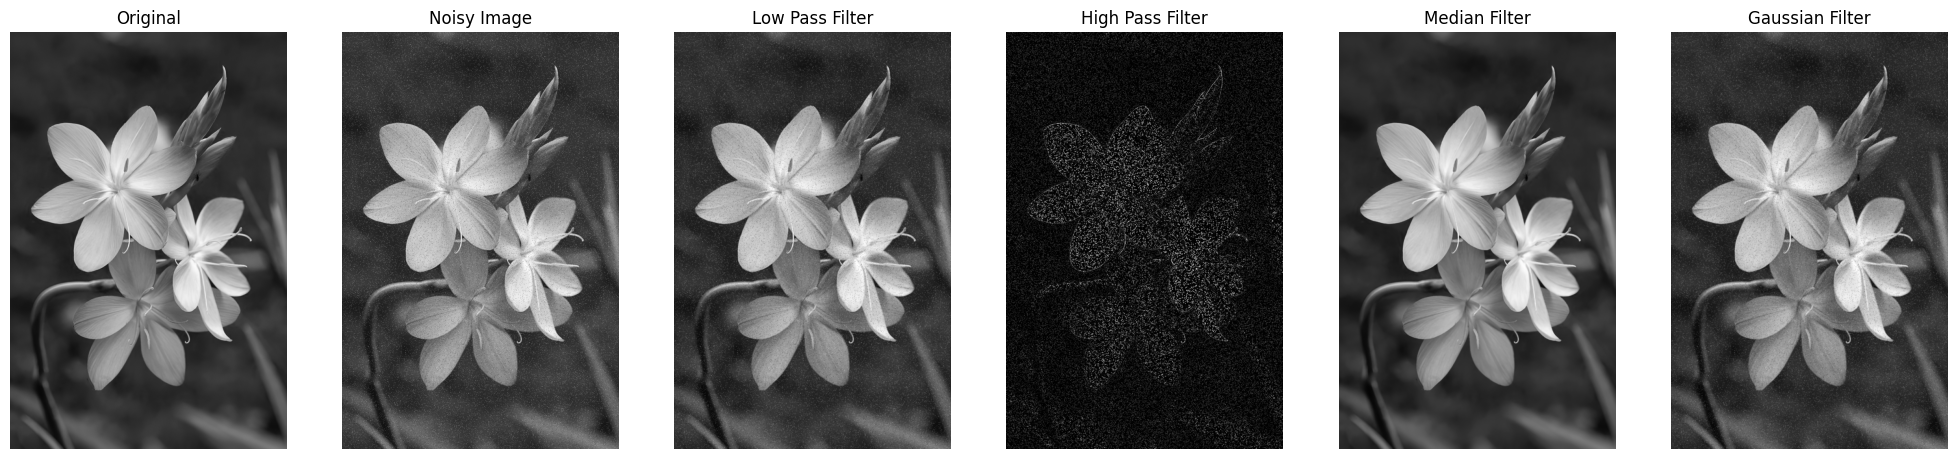

In [10]:
# Store images and titles
images = [image, noisy_image, low_pass_image, high_pass_image, median_filtered_image, gaussian_filter_image]
titles = ["Original", "Noisy Image", "Low Pass Filter", "High Pass Filter", "Median Filter", "Gaussian Filter"]

# Display Results
fig, axes = plt.subplots(1, len(images), figsize=(25,9))
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()